## Meteoric Water Lines (MWL)
* Global (GMWL)
* Local: Mores Creek Watershed (MCW); Treasure Valley, ID (TV); Dry Creek Experimental Watershed (DCEW)

In [1]:
from pathlib import Path
sys.path.append(str(Path().resolve().parent / 'Scripts'))
from packages import *
import colors

### Global and Local Meteoric Water Lines

In [2]:
# δ2H = 7.40 * δ18O – 2.176  local meteoric water line BOise, ID
# δ2H = 8 * δ18O + 10 GMWL
m_global = 8 
b_global = 10
x_global = np.linspace(-6,-25) 

#Local MWL
m_local = 7.4
b_local = -2.176

### Mores Creek

In [3]:
import read_mcw
df = read_mcw.read_and_process()
df.head()

,Sample Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Type,Site_no,D_18O_Rain,D_18O_Snow,D_18O_MC,D_18O_BC,D_2H_Rain,D_2H_Snow,D_18O_std_Rain,D_18O_std_Snow,D_18O_StDev_Precip,D_18O_Precip,D_2H_Precip
0,1,BC,2022-10-05,-126.803089,0.905,-16.459499,0.1660,BC,NaN,NaN,NaN,NaN,-16.459499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,MC,2022-10-05,-121.245698,0.503,-16.055768,0.0923,MC,NaN,NaN,NaN,-16.055768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BC,2022-10-27,-124.454618,0.553,-16.515137,0.1370,BC,NaN,NaN,NaN,NaN,-16.515137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,MC,2022-10-27,-120.942857,0.834,-15.892233,0.2420,MC,NaN,NaN,NaN,-15.892233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RC_01,2022-10-27,-92.796701,1.390,-12.540525,0.2320,RC,1.0,-12.540525,NaN,NaN,NaN,-92.796701,NaN,0.232,NaN,0.232,-12.540525,-92.796701


### Treasure Valley

In [4]:
#local isotope dataset from Danny Tappa; 2013
dd = pd.read_csv('../Data/16.DCEW_Danny_Precip_Isotopes.csv',parse_dates = [1])
dd.rename(columns={'Site_ID': 'Type'}, inplace=True)
dd.head()

,Type,Collection_Date,D_2H_Precip,D_18O_Precip
0,Lower Deer Point,2009-11-13,-150.39,-19.06
1,Lower Deer Point,2010-01-13,-84.22,-11.37
2,Lower Deer Point,2010-01-20,-131.73,-15.63
3,Lower Deer Point,2010-01-20,-136.24,-17.27
4,Lower Deer Point,2010-03-29,-118.34,-15.84


### Dry Creek

In [5]:
# BSU DCEW Data 2023
import read_dcew
dc = read_dcew.read_and_process()
dc.head()

,Sample_Name,Site_ID,Collection_Date,D_2H,D_2H_StDev,D_18O,D_18O_StDev,Site_no,Type,elevation
0,1156,DC-C1E-1156,2022-10-14,-119.004213,2.06,-16.158380,0.337,C1E,DC,1335
1,1159,DC-LR-1159,2022-10-14,-116.504324,1.30,-15.740716,0.290,LR,DC,1060
2,1162,DC-MR-1162,2022-10-14,-116.139389,1.92,-15.774813,0.210,MR,DC,1062
3,1165,DC-UR-1165,2022-10-14,-116.716963,1.26,-15.704451,0.340,UR,DC,1064
4,1168,DC-LG-1168,2022-10-28,-115.228865,2.55,-15.776125,0.217,LG,DC,1036


In [6]:
#remove ID numbers from site names
dc['Site_no'] = dc.Site_ID.str[3:6]
dc['Type'] = 'DC'
dc.head()

#take out -
dc = dc.replace(['LR-'],'LR')
dc = dc.replace(['MR-'],'MR')
dc = dc.replace(['UR-'],'UR')
dc = dc.replace(['LG-'],'LG')
dc['Site_no'].unique()

array(['C1E', 'LR', 'MR', 'UR', 'LG', 'C2E', 'C2M', 'C1W'], dtype=object)

(-130.0, -110.0)

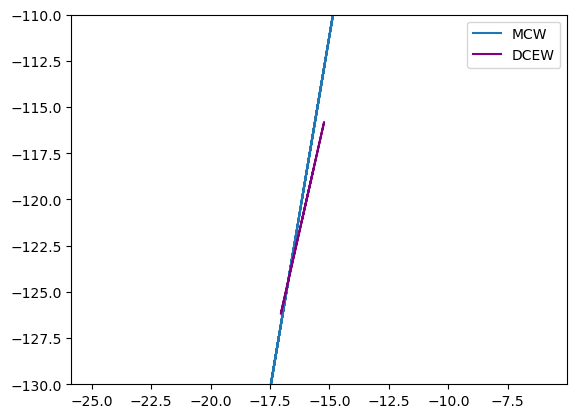

In [7]:
# Mores Creek D_O18 Values 
x = df['D_18O_Precip']
y = df['D_2H_Precip']

#obtain m (slope) and b(intercept) of linear regression line
#m, b = np.polyfit(x, y, 1)

idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)

plt.plot(x, m*x+b, label='MCW')

# Dry Creek D_18O values & regression line 
x_dc = dc['D_18O']
y_dc = dc['D_2H']
c,d = np.polyfit(x_dc, y_dc, 1)
plt.plot(x_dc, c*x_dc+d, linestyle='solid', color ='purple', label='DCEW')
plt.legend()

#zoom up on dry creek
plt.ylim(-130, -110)

MC LinregressResult(slope=np.float64(7.658419498481313), intercept=np.float64(3.7392019760144564), rvalue=np.float64(0.9944389868330338), pvalue=np.float64(1.620730527033989e-149), stderr=np.float64(0.06600242234058701), intercept_stderr=np.float64(1.0605487582915099))
DC LinregressResult(slope=np.float64(5.700481169861545), intercept=np.float64(-29.019569405844734), rvalue=np.float64(0.8607820421232437), pvalue=np.float64(2.4141011330797137e-72), stderr=np.float64(0.2175745425576873), intercept_stderr=np.float64(3.4826638157207714))
r_squared_MCW = 0.9889088985335107


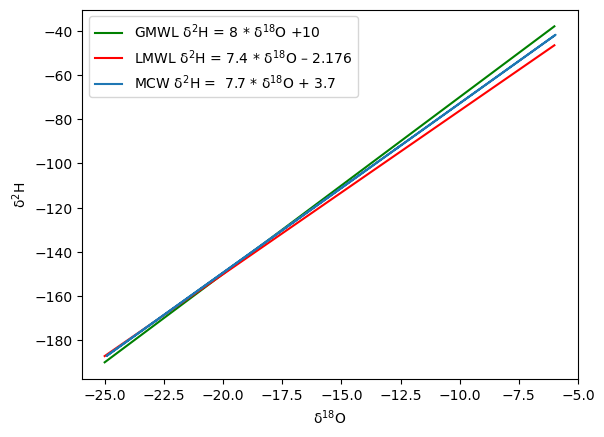

In [8]:
#GMWL & LMWL 
plt.plot(x_global, m_global * x_global + b_global, linestyle='solid', color="g",
         label=r'GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')
plt.plot(x_global, m_local * x_global + b_local, linestyle='solid', color='r',
         label=r'LMWL $\mathregular{δ^{2}}$H = 7.4 * $\mathregular{δ^{18}}$O – 2.176')

# Mores Creek D_O18 Values 
x = df['D_18O_Precip']
y = df['D_2H_Precip']
#plt.scatter(x,y,s=10,color='gray')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x[idx], y[idx], 1)

#add linear regression line to scatterplot
plt.plot(x[idx], m*x[idx]+b, label=r'MCW $\mathregular{δ^{2}}$H =  7.7 * $\mathregular{δ^{18}}$O + 3.7')
plt.ylabel(r'$\mathregular{δ^{2}}$H')
plt.xlabel(r'$\mathregular{δ^{18}}$O')
plt.legend()

# Dry Creek D_18O values & regression line 
#x_dc = dc['D_18O']
#y_dc = dc['D_2H']
#m, b = np.polyfit(x_dc, y_dc, 1)
#c, d = np.polyfit(x_dc, y_dc, 1)
#plt.plot(x_dc, c*x_dc+d, linestyle='solid', color ='purple', linewidth=2.0, label='R2 DCEW = ')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_dc, y_dc)
slope, intercept, r_mcw, p_value, std_err = scipy.stats.linregress(x[idx], y[idx])

print('MC',linregress(x[idx],y[idx]))
print('DC',linregress(x_dc,y_dc))

r_squared_MCW = r_mcw ** 2
print('r_squared_MCW =', r_squared_MCW);

#### Local MWL Points vs MCW Points 

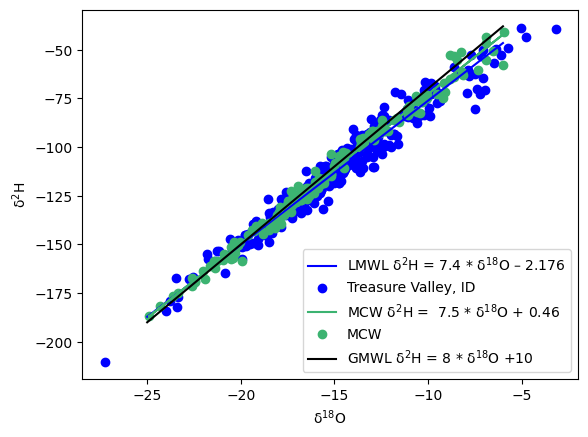

In [9]:
#Treasure valley poinst from 2013 combined with Mores Creek from 2022-2023
plt.plot(x_global, m_local * x_global + b_local, linestyle='solid', color='blue',
         label=r'LMWL $\mathregular{δ^{2}}$H = 7.4 * $\mathregular{δ^{18}}$O – 2.176')

plt.scatter(dd['D_18O_Precip'],dd['D_2H_Precip'], label='Treasure Valley, ID', color='blue')

#add linear regression line to scatterplot
plt.plot(x[idx], m*x[idx]+b, color=colors.mcw, label=r'MCW $\mathregular{δ^{2}}$H =  7.5 * $\mathregular{δ^{18}}$O + 0.46')

plt.scatter(df['D_18O'], df['D_2H'], label='MCW', color=colors.mcw)
#sns.scatterplot(x="D_18O", y="D_2H", data=dd)

#adding GMWL
plt.plot(x_global, m_global * x_global + b_global, linestyle='solid', color="black",
         label=r'GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')

plt.ylabel(r'$\mathregular{δ^{2}}$H')
plt.xlabel(r'$\mathregular{δ^{18}}$O')
plt.legend();

In [10]:
TV = pd.concat([df, dd]).sort_index()
TV['D_18O_Precip'].dropna(inplace=True)
TV['Type'].unique()

array(['BC', 'Lower Deer Point', 'MC', 'RC', 'IB', 'Lower Weather',
       'Mountain View HS', 'Taft Elementary', 'Treeline',
       'Washington Elementary'], dtype=object)

In [11]:
def Site (row):
   if row['Type'] == 'MC' :
      return 'MCW'
   if row['Type'] == 'BC' :
      return 'MCW'
   if row['Type'] == 'IB' :
      return 'MCW'
   if row['Type'] == 'RC' :
      return 'MCW'
   if row['Type'] == 'Lower Deer Point' :
      return 'TV'
   if row['Type'] == 'Lower Weather' :
      return 'TV'
   if row['Type'] == 'Mountain View HS' :
      return 'TV'
   if row['Type'] == 'Taft Elementary' :
      return 'TV'
   if row['Type'] == 'Treeline' :
      return 'TV'
   if row['Type'] == 'Washington Elementary' :
      return 'TV'

TV['Site'] = TV.apply (lambda row: Site(row), axis=1)

In [12]:
TVMC = pd.read_csv('../Data/17.MCW_DCEW_Stream_Iso.csv',parse_dates = [1])
# this file does not have stream samples.....?

def Site_ID (row):
   if row['Site_ID'] == 'MC' :
      return 'MCW'
   if row['Site_ID'] == 'BC' :
      return 'MCW'
   if row['Site_ID'] == 'IB' :
      return 'MCW'
   if row['Site_ID'] == 'RC' :
      return 'MCW'
   if row['Site_ID'] == 'Lower Deer Point' :
      return 'TV'
   if row['Site_ID'] == 'Lower Weather' :
      return 'TV'
   if row['Site_ID'] == 'Mountain View HS' :
      return 'TV'
   if row['Site_ID'] == 'Taft Elementary' :
      return 'TV'
   if row['Site_ID'] == 'Treeline' :
      return 'TV'
   if row['Site_ID'] == 'Washington Elementary' :
      return 'TV'

TVMC['Type'] = TVMC.apply (lambda row: Site_ID(row), axis=1)
TVMC.head(2)

,Site_ID,Collection_Date,D_2H,D_18O,Unnamed: 4,Unnamed: 5,Type
0,RC,2022-10-27,-92.796701,-12.540525,NaN,NaN,MCW
1,RC,2022-10-27,-95.549245,-13.497653,NaN,NaN,MCW


## Mass Weighted MWL: Rain vs Snow

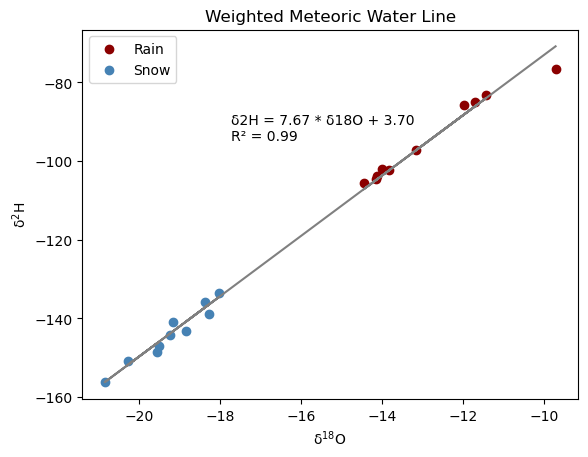

In [13]:
#Weighted Isotopes from 06_precip_stream_stats.ipynb 
D2H_RC = [-76.66, -101.90, -104.64, -85.04, -85.71, -97.22, -83.27, -102.14, -105.53, -103.77]
D2H_IB = [-143.143, -139.02, -144.36, -148.62, -156.28, -147.14, -150.87, -133.44, -135.86, -141.05]
RC = [-9.7155, -14.01384, -14.16618, -11.6961, -11.9838, -13.16526, -11.43958, -13.836019, -14.4588, -14.140187]
IB = [-18.84741, -18.280612, -19.237479, -19.55665, -20.859719, -19.51508, -20.27681, -18.035748, -18.379337, -19.17537]
Elv = [922,1160,1266,1455,1755,1780,1860,2036,2145,2316]

# Combine data
x_w = np.array(RC + IB).reshape((-1, 1))
y_w = np.array(D2H_RC + D2H_IB)

# linear regression model
model = LinearRegression().fit(x_w, y_w)

# Get the equation of the line
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y_w, model.predict(x_w))

# Add the regression line
plt.plot(x_w, model.predict(x_w), color='gray')

# scatter plot
plt.scatter(RC, D2H_RC, color=colors.rain, marker='o', label='Rain') 
plt.scatter(IB, D2H_IB, color=colors.snow, marker='o', label='Snow') 

# Add the equation and R^2 value to the plot
plt.text(0.3, 0.7, f'δ2H = {slope:.2f} * δ18O + {intercept:.2f}\nR² = {r2:.2f}', transform=plt.gca().transAxes)

plt.xlabel(r'$\mathregular{δ^{18}}$O')
plt.ylabel(r'$\mathregular{δ^{2}}$H')
plt.title('Weighted Meteoric Water Line')
plt.legend();

In [14]:
# Create a dictionary with column names and corresponding weighted isotope values
data = {
    'D2H_RC': [-76.66, -101.90, -104.64, -85.04, -85.71, -97.22, -83.27, -102.14, -105.53, -103.77],
    'D2H_IB': [-143.143, -139.02, -144.36, -148.62, -156.28, -147.14, -150.87, -133.44, -135.86, -141.05],
    'RC': [-9.7155, -14.01384, -14.16618, -11.6961, -11.9838, -13.16526, -11.43958, -13.836019, -14.4588, -14.140187],
    'IB': [-18.84741, -18.280612, -19.237479, -19.55665, -20.859719, -19.51508, -20.27681, -18.035748, -18.379337, -19.17537],
    'Elv': [922, 1160, 1266, 1455, 1755, 1780, 1860, 2036, 2145, 2316]
}
mw = pd.DataFrame(data)

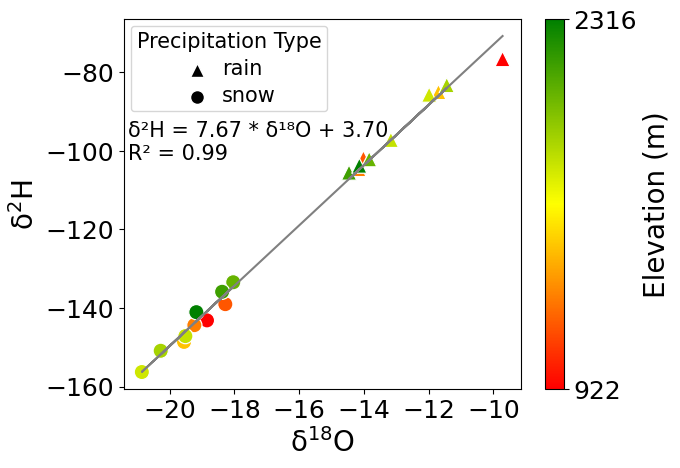

In [15]:
# Rain vs snow with elevation shading 
x = np.array(RC + IB).reshape((-1, 1))
y = np.array(D2H_RC + D2H_IB)

# Create a custom color map for elevation
elevation_cmap = LinearSegmentedColormap.from_list('elevation', ['red', 'yellow', 'green'], N=256)

# Plot Rain and Snow data with custom elevation color scale
sns.scatterplot(x='RC', y='D2H_RC', data=mw, marker='^', s=120, hue='Elv', palette=elevation_cmap)
sns.scatterplot(x='IB', y='D2H_IB', data=mw, marker='o', s=120, hue='Elv', palette=elevation_cmap, legend=False)

# Plotting the data
plt.plot(x, model.predict(x), color='gray')

# Add the equation and R^2 value to the plot
plt.text(0.01, 0.62, f'δ²H = {slope:.2f} * δ¹⁸O + {intercept:.2f}\nR² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=15)

# Add the regression line
plt.xlabel(r'$\mathregular{δ^{18}}$O',fontsize=20)
plt.ylabel(r'$\mathregular{δ^{2}}$H',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Create custom legend handles
rain_handle = Line2D([0], [0], marker='^', color='w', markerfacecolor='black', markersize=10, label='rain')
snow_handle = Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='snow')

# Create the legend with custom handles
#plt.legend(handles=[rain_handle, snow_handle], title='Precipitation Type', loc='upper right',bbox_to_anchor=(0.39, 1))
legend = plt.legend(handles=[rain_handle, snow_handle], title='Precipitation Type', loc='upper right',bbox_to_anchor=(0.53, 1))
plt.setp(legend.get_texts(), fontsize=15)  # Set font size for legend text
plt.setp(legend.get_title(), fontsize=15)  # Set font size for legend title


# Create a ScalarMappable for elevation values in mw['Elv']
norm = Normalize(vmin=mw['Elv'].min(), vmax=mw['Elv'].max())
sm = ScalarMappable(cmap=elevation_cmap, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Create a new colorbar for elevation values in mw['Elv']
elevation_cbar = plt.colorbar(sm, ax=plt.gca(),ticks=[mw['Elv'].min(), mw['Elv'].max()], orientation='vertical', pad=0.05)
elevation_cbar.set_label('Elevation (m)', fontsize=20)
elevation_cbar.ax.tick_params(labelsize=18);

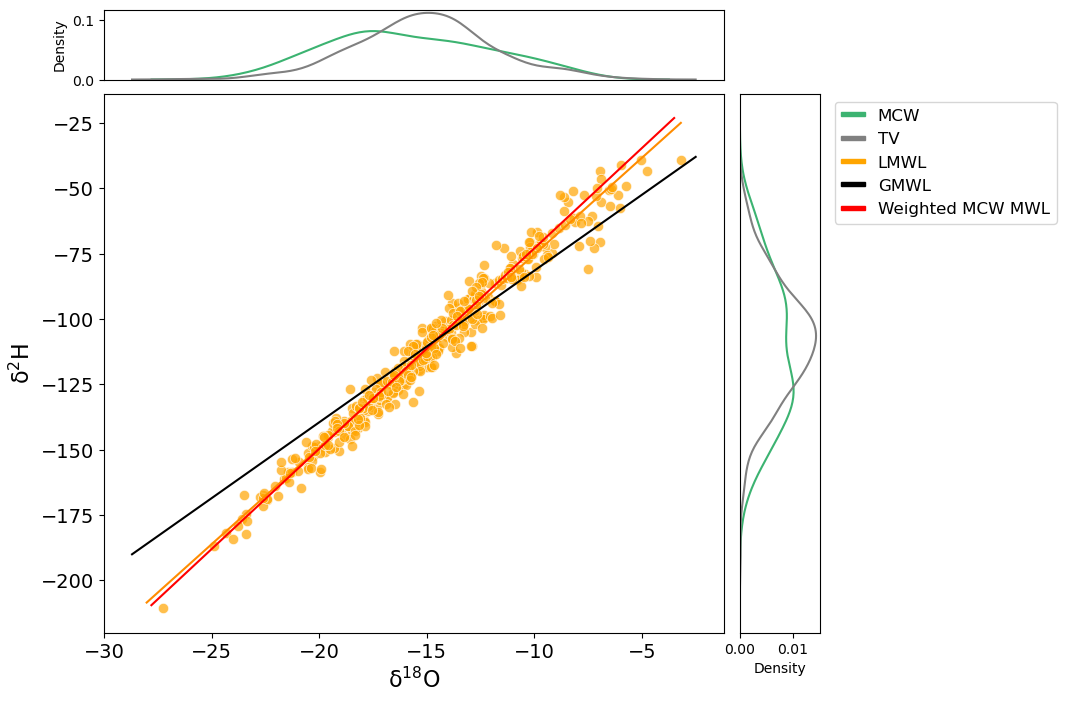

In [16]:
x1= TVMC['D_18O']
y1 = TVMC['D_2H']

# Separate 'D_18O' values based on 'Type'
O1 = TVMC[TVMC['Type'] == 'MCW']['D_18O']
O2 = TVMC[TVMC['Type'] == 'TV']['D_18O']
# Separate 'D_2H' values based on 'Type'
H1 = TVMC[TVMC['Type'] == 'MCW']['D_2H']
H2 = TVMC[TVMC['Type'] == 'TV']['D_2H']

# Normalize the data
O1_normalized = (O1 - O1.min()) / (O1.max() - O1.min())
H1_normalized = (H1 - H1.min()) / (H1.max() - H1.min())

O2_normalized = (O2 - O2.min()) / (O2.max() - O2.min())
H2_normalized = (H2 - H2.min()) / (H2.max() - H2.min())


fig, ax1 = plt.subplots(figsize=(8, 7))

scatter = sns.scatterplot(x=x1, y=y1, color='orange', alpha=.7, ax=ax1, s=55)
plt.xlabel(r'$\mathregular{δ^{18}}$O', fontsize=16)
plt.ylabel(r'$\mathregular{δ^{2}}$H', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#obtain m (slope) and b(intercept) of linear regression line
# Define a broader range for x1
x1_extended = np.linspace(min(x1) - 0.75, max(x1) + 0, 500) 
m, b = np.polyfit(x1, y1, 1)
#add MCW + TV linear regression line to scatterplot
plt.plot(x1_extended, m*x1_extended+b, label=r'MCW+TV $\mathregular{δ^{2}}$H =  7.4 * $\mathregular{δ^{18}}$O -1.4', color='darkorange')

# Fit MCW linear regression model
x_w = np.linspace(-3.5, -27.8)  # Extend the x-range
y_pred = model.predict(x_w.reshape(-1, 1))  # Predict corresponding y-values
# Plot the extended regression line
plt.plot(x_w, y_pred, color='red', label='Mass Weighted δ2H = 7.67 * δ18O + 3.7\nR² = 0.99')
 
#adding GMWL
xx_global = np.linspace(-2.5,-28.7)
plt.plot(xx_global, m_global * x_global + b_global, linestyle='solid', color="black",
         label=r'GMWL $\mathregular{δ^{2}}$H = 8 * $\mathregular{δ^{18}}$O +10')

# Create a new axis above for the normalized values on the x-axis
divider_x = make_axes_locatable(ax1)
ax2_width = 0.1  # Adjust the width of ax2 as needed
ax2 = fig.add_axes([ax1.get_position().x0, ax1.get_position().y1 + 0.02, ax1.get_position().width, ax2_width])
sns.kdeplot(x=O1, data=TVMC, color='mediumseagreen', ax=ax2)
sns.kdeplot(x=O2, data=TVMC, color='gray', ax=ax2)
ax2.set_xticks([])  # Remove x-axis ticks for better alignment
#ax2.get_legend().remove()  # Remove legend for the normalized values on the x-axis
ax2.set_xlabel('') 

# Create a new axis to the right for the normalized values on the y-axis
divider_y = make_axes_locatable(ax1)
ax3 = fig.add_axes([ax1.get_position().x1 + 0.02, ax1.get_position().y0, 0.1, ax1.get_position().height])
sns.kdeplot(y=H1, data=TVMC, color='mediumseagreen', ax=ax3)
sns.kdeplot(y=H2, data=TVMC, color= 'gray', ax=ax3)
ax3.set_yticks([])  # Remove y-axis ticks for better alignment
ax3.set_ylabel('') 


# Set the width of ax3 to match the width of ax1
ax3.set_position([ax1.get_position().x1 + 0.02, ax1.get_position().y0, 0.1, ax1.get_position().height])

# Create custom legend
legend_patches = [
    mpatches.Patch(color='mediumseagreen', label='MCW'),
    mpatches.Patch(color='gray', label='TV'),
    mpatches.Patch(color='orange', label='LMWL'),
    mpatches.Patch(color='black', label='GMWL'),
    mpatches.Patch(color='red', label='Weighted MCW MWL')
]

# Place the legend at the desired location
custom_legend = ax1.legend(handles=legend_patches, loc='upper right',
                           bbox_to_anchor=(1.55, 1.0), handlelength=1.4, handleheight=0.01, fontsize=12)

#### Additional Analysis of Dis Plot

In [17]:
print('O1',O1_normalized.max())
print('O2',O2_normalized.max())
print('H1',H1_normalized.max())
print('H2',H2_normalized.max())
print("O1 Range:", O1.min(), "to", O1.max())
print("O2 Range:", O2.min(), "to", O2.max())
print("H1 Range:", H1.min(), "to", H1.max())
print("H2 Range:", H2.min(), "to", H2.max())
print("01 Med", O1.median())
print("02 Med", O2.median())
print("H1 Med", H1.median())
print("H2 Med", H2.median())

O1 1.0
O2 1.0
H1 1.0
H2 1.0
O1 Range: -24.911989 to -5.948968
O2 Range: -27.27 to -3.19
H1 Range: -186.964495 to -41.099686
H2 Range: -210.55 to -39.06
01 Med -15.8867975
02 Med -14.69
H1 Med -117.68930549999999
H2 Med -110.39


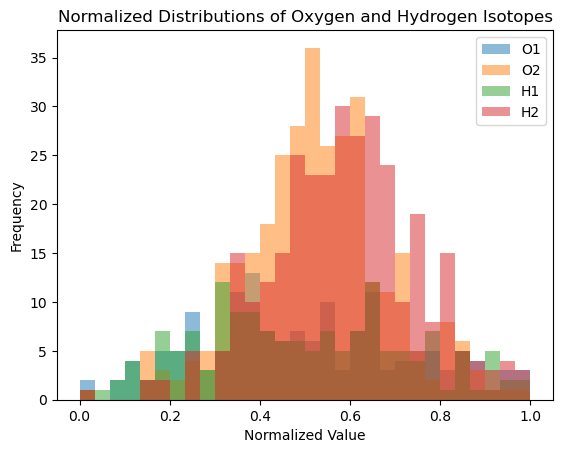

In [18]:
plt.hist(O1_normalized, bins=30, alpha=0.5, label='O1')
plt.hist(O2_normalized, bins=30, alpha=0.5, label='O2')
plt.hist(H1_normalized, bins=30, alpha=0.5, label='H1')
plt.hist(H2_normalized, bins=30, alpha=0.5, label='H2')
plt.legend()
plt.xlabel("Normalized Value")
plt.ylabel("Frequency")
plt.title("Normalized Distributions of Oxygen and Hydrogen Isotopes")
plt.show()